In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Activity 1

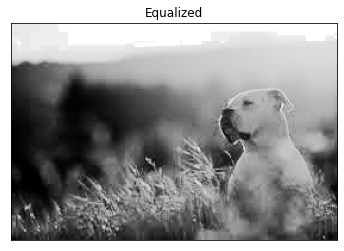

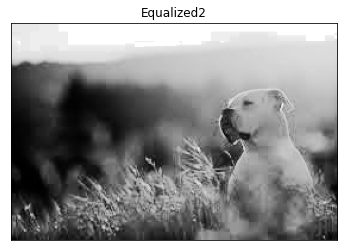

In [2]:
#Load
img = cv.imread('dog1.jfif', 0)

# Equalize
equ = cv.equalizeHist(img)
equ2 = cv.equalizeHist(equ)

plt.subplot(111)
plt.imshow(equ, cmap = 'gray')
plt.title('Equalized')
plt.xticks([])
plt.yticks([])
plt.show()

plt.subplot(111)
plt.imshow(equ2, cmap = 'gray')
plt.title('Equalized2')
plt.xticks([])
plt.yticks([])
plt.show()

- There are no difference when histogram equalization applied twice. This is because histogram equalization is idempotent which the value of histogarm equalization does not change when it multiplied by itself.

## Activity 2

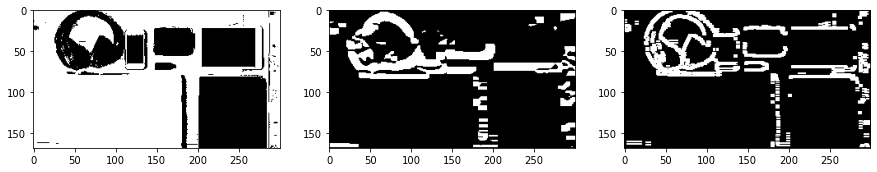

In [106]:
# 2A
# Load
img = cv.imread('electronic.jfif', 0)

# threshold
ret, th = cv.threshold(img, 110, 255, cv.THRESH_BINARY)

# Sobel y uint8
sobel_8u = cv.Sobel(th, cv.CV_8U, 0, 1, ksize = 11)

# Sobel y float64
sobel_64f = cv.Sobel(th, cv.CV_64F, 0, 1, ksize = 5)

# Change back to unsigned integer
sobel_64f_8u = cv.convertScaleAbs(sobel_64f)


plt.figure(figsize = (15, 15)) 
plt.subplot(1, 3, 1)
plt.imshow(th, 'gray')
plt.subplot(1, 3, 2)
plt.imshow(sobel_8u, 'gray')
plt.subplot(1, 3, 3)
plt.imshow(sobel_64f_8u, 'gray')
plt.show()

In [2]:
# 2B 
img = cv.imread('electronic.jfif', 0)
blur = cv.GaussianBlur(img, (3, 3), 0)

# Sobel x and sobel y (Without Gaussian Blurring)
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = 3)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = 3)

# Sobel x and sobel y (With Gaussian Blurring)
sobel_blur_x = cv.Sobel(blur, cv.CV_64F, 1, 0, ksize = 3)
sobel_blur_y = cv.Sobel(blur, cv.CV_64F, 0, 1, ksize = 3)

# L2-norm formula (Without Gaussian Blurring)
grad_mag = cv.magnitude(sobelx, sobely)
grad_mag = cv.convertScaleAbs(grad_mag)

# L2-norm formula (With Gaussian Blurring)
blur_grad_mag = cv.magnitude(sobel_blur_x, sobel_blur_y)
blur_grad_mag = cv.convertScaleAbs(blur_grad_mag)

cv.imshow('result', np.hstack((grad_mag, blur_grad_mag)))
cv.waitKey(0)
cv.destroyAllWindows()

In [108]:
# 2C
img = cv.imread('electronic.jfif', 0)
img_blur = cv.GaussianBlur(img, (5, 5), 0)

# Laplacian
laplacian = cv.Laplacian(img_blur, cv.CV_64F, ksize = 5)
laplacian_8u = cv.convertScaleAbs(laplacian)

cv.imshow('laplacian', laplacian_8u)
cv.waitKey(0)
cv.destroyAllWindows()

- Based on the exercise conducted from (A)-(C), performing edge detection using Soble operator is optimal (B). This is because (B) has the smallest kernel size and it can detect the edge of the object clearer compare to other image processing path.

## Activity 3

### Sobel 

(Text(0.5, 1.0, 'Sobel'), ([], []), ([], []))

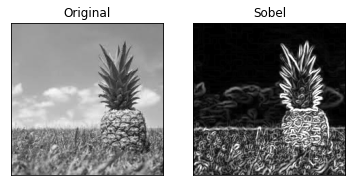

In [24]:
# Sobel Operation
img = cv.imread('pineapple.jfif', 0)
blur = cv.GaussianBlur(img, (3, 3), 0)


# Sobel x and sobel y 
sobel_blur_x = cv.Sobel(blur, cv.CV_64F, 1, 0, ksize = 3)
sobel_blur_y = cv.Sobel(blur, cv.CV_64F, 0, 1, ksize = 3)

# L2-norm formula 
blur_grad_mag = cv.magnitude(sobel_blur_x, sobel_blur_y)
blur_grad_mag = cv.convertScaleAbs(blur_grad_mag)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur_grad_mag, cmap='gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

- In sobel edge detector, the edge of pineapple, grass was shown clearly. However, the cloud was not so clear.

### Laplacian 

(Text(0.5, 1.0, 'Laplacian'), ([], []), ([], []))

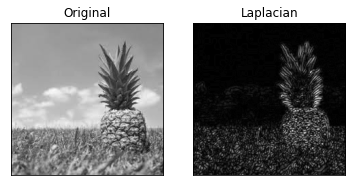

In [26]:
img = cv.imread('pineapple.jfif', 0)
img_blur = cv.GaussianBlur(img, (5, 5), 0)

# Laplacian
laplacian = cv.Laplacian(img_blur, cv.CV_64F, ksize = 3)
laplacian_8u = cv.convertScaleAbs(laplacian)


plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(laplacian_8u, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

- In Laplacian edge detector, when we set the kernel size to 3, the result was not so clear. We can merely see the pineapple and the grass.

### Prewitt

(Text(0.5, 1.0, 'Prewitt'), ([], []), ([], []))

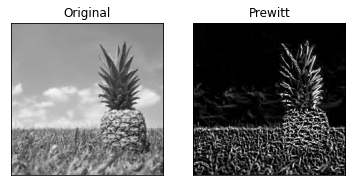

In [27]:
img = cv.imread('pineapple.jfif', 0)

# define filters
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

# take all verticle edges
prewittx = cv.filter2D(img, -1, kernelx)

# take all horizontal edges
prewitty = cv.filter2D(img, -1, kernely)

# combine both
prewitt = prewittx + prewitty

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])

- In sobel edge detector, the edge of pineapple, grass was shown clearly. However, the cloud was not so clear.

### Scharr Derivative

(Text(0.5, 1.0, 'Scharr'), ([], []), ([], []))

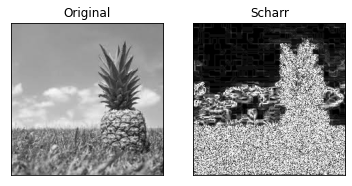

In [28]:
img = cv.imread('pineapple.jfif', 0)

scharr_x = cv.Scharr(img, cv.CV_64F, 1, 0)
scharr_y = cv.Scharr(img, cv.CV_64F, 0, 1)

scharr_x_abs = np.uint8(np.absolute(scharr_x))
scharr_y_abs = np.uint8(np.absolute(scharr_y))

scharr = cv.bitwise_or(scharr_x_abs, scharr_y_abs)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(scharr, cmap='gray')
plt.title('Scharr'), plt.xticks([]), plt.yticks([])

- In scharr derivative, the edge of pineapple, grass and cloud was detected. However, we can clearly see the whole pineapple. There are also some noises appear in the result.

### Canny Edge

(Text(0.5, 1.0, 'Canny'), ([], []), ([], []))

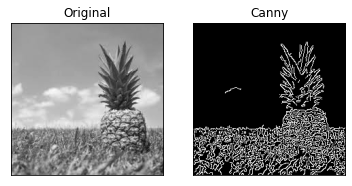

In [29]:
img = cv.imread('pineapple.jfif', 0)
edges = cv.Canny(img, 100, 200)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

- In canny edge detector, the edge of pineapple and the grass is shown clearly. However, it detects an edge of the cloud. Canny detector has the best result compare to others edge detector.

## Activity 4

In [47]:
img = cv.imread('electronic.jfif', 0)

# Thresholding
img_blur = cv.GaussianBlur(img, (3, 3), 0)
ret, th = cv.threshold(img_blur, 100, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# find contour
contour, _ = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# draw contour
cnt = contour[0]
img_bgr = cv.imread('electronic.jfif')
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
cv.drawContours(img_bgr, [cnt], 0, (0, 255, 0), 2, cv.LINE_AA)

x, y, w, h = cv.boundingRect(cnt)
cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv.imshow('contour', img_bgr)
cv.waitKey(0)

-1